In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report

In [80]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin1')

In [81]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [83]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [84]:
df.where((pd.notnull(df)),' ')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,,,
5568,ham,Will Ì_ b going to esplanade fr home?,,,
5569,ham,"Pity, * was in mood for that. So...any other s...",,,
5570,ham,The guy did some bitching but I acted like i'd...,,,


In [85]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [86]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape

(5169, 2)

In [88]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3595,ham,Good morning princess! Happy New Year!
4560,ham,Good afternoon my boytoy. How goes that walkin...
575,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
3216,ham,Come to mahal bus stop.. &lt;DECIMAL&gt;
5526,spam,PRIVATE! Your 2003 Account Statement for shows...


In [89]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [90]:
df.isnull().sum()


target    0
text      0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

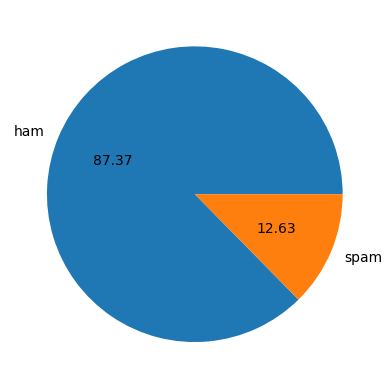

In [93]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [94]:
import nltk

In [95]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [96]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [97]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [98]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [99]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [100]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

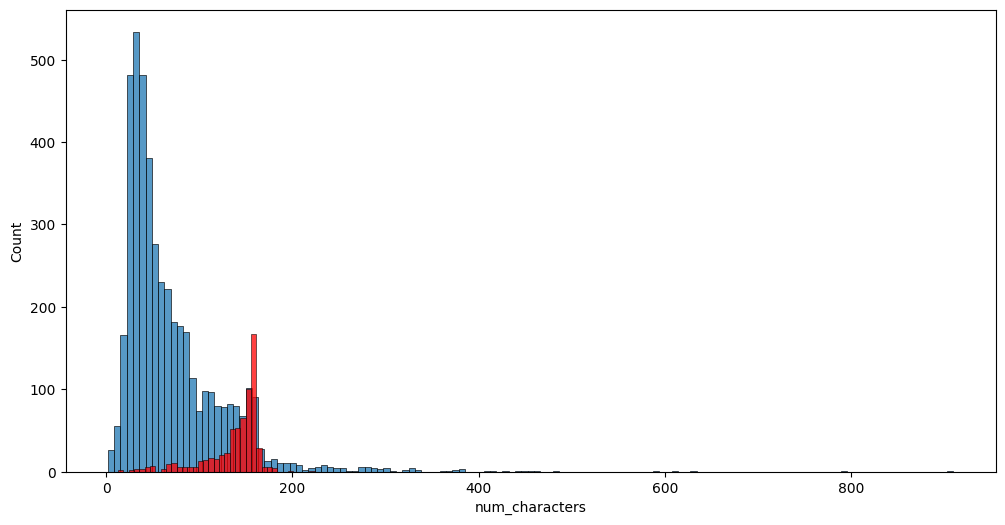

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

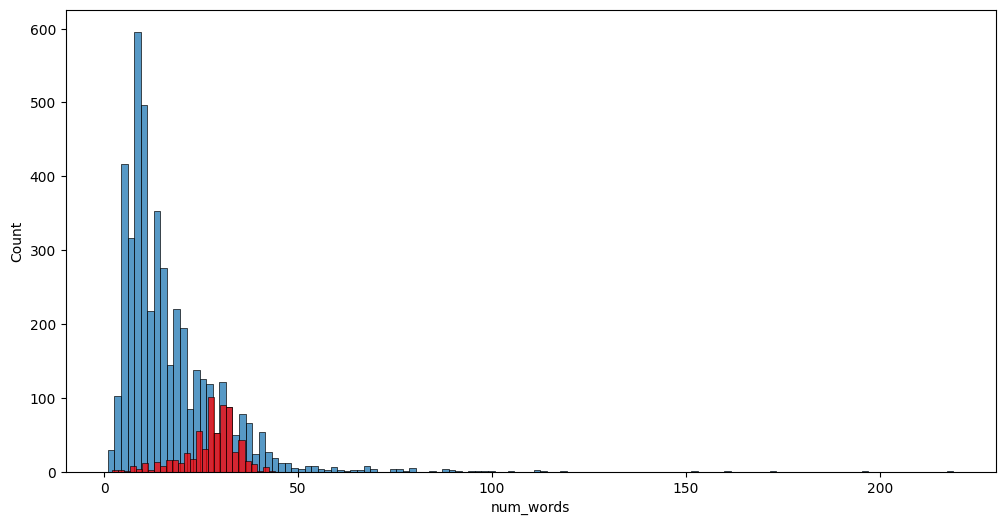

In [102]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

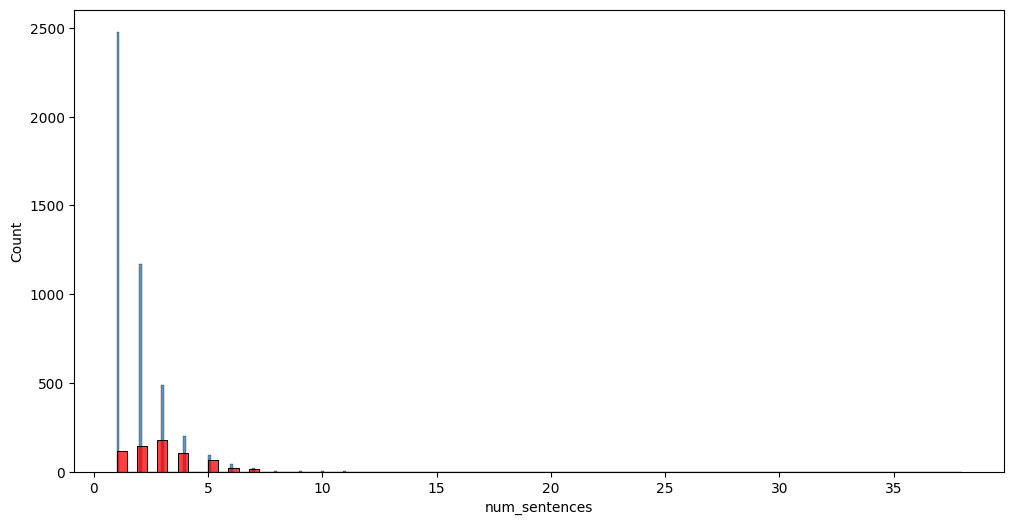

In [103]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

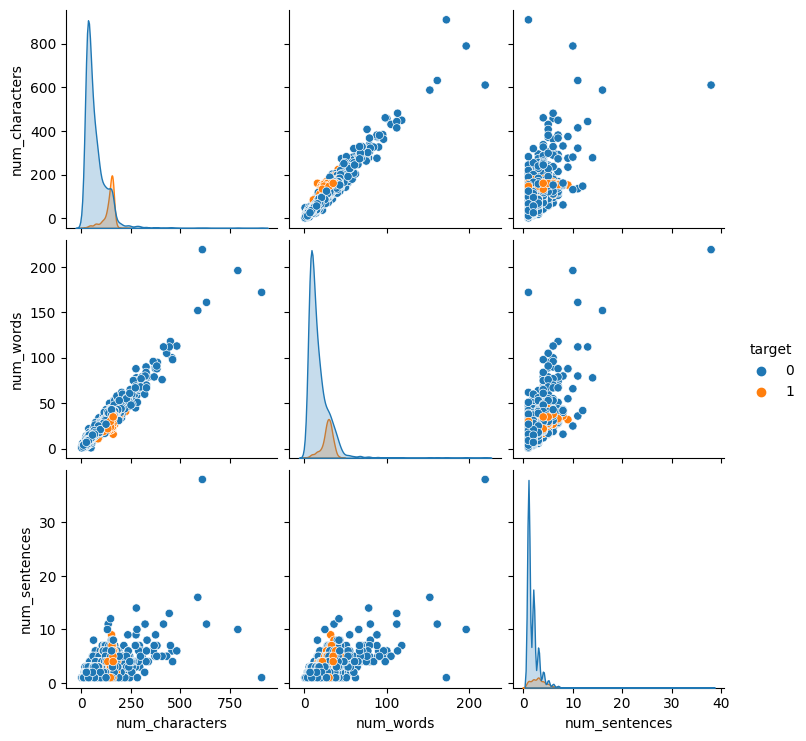

In [104]:
sns.pairplot(df,hue='target')

In [105]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()
    
    filtered_text = []
    for word in text:
        if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
            filtered_text.append(ps.stem(word))
    
    return " ".join(filtered_text)

In [106]:
transform_text("I call you later, don't have network. If urgnt, sms me.")


'call later network urgnt sm'

In [107]:
df['text'][87]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [109]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head(4)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [110]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

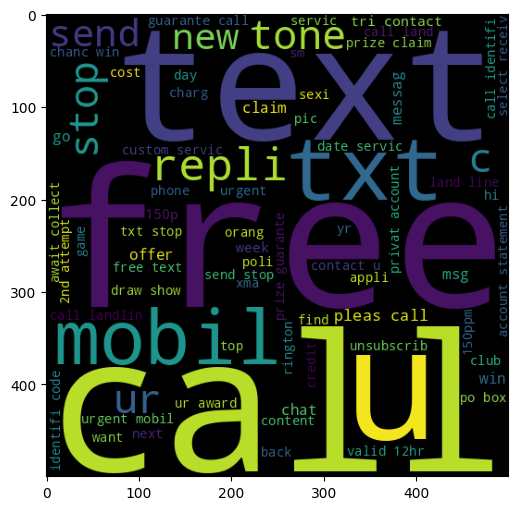

In [111]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

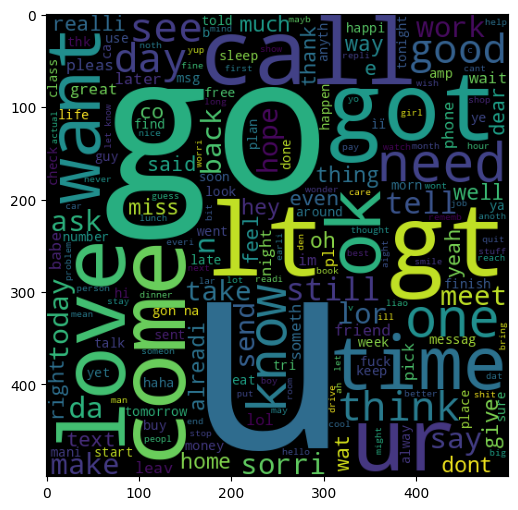

In [112]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [113]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [114]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [116]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [117]:
X.shape

(5169, 3001)

In [118]:
y = df['target'].values
y.shape

(5169,)

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [120]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [121]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [122]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred1))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred1))
print('Precision Score:',precision_score(y_test,y_pred1))


Accuracy Score: 0.8887814313346228
Confusion matrix:
 [[799  97]
 [ 18 120]]
Precision Score: 0.5529953917050692


In [123]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred2))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred2))
print('Precision Score:',precision_score(y_test,y_pred2))


Accuracy Score: 0.9700193423597679
Confusion matrix:
 [[889   7]
 [ 24 114]]
Precision Score: 0.9421487603305785


In [124]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred3))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred3))
print('Precision Score:',precision_score(y_test,y_pred3))


Accuracy Score: 0.9816247582205029
Confusion matrix:
 [[895   1]
 [ 18 120]]
Precision Score: 0.9917355371900827


In [125]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [126]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [127]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [128]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [129]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8868471953578336
Precision -  0.9565217391304348
For  NB
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785
For  DT
Accuracy -  0.9448742746615088
Precision -  0.8785046728971962
For  LR
Accuracy -  0.965183752417795
Precision -  0.9553571428571429
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667
For  BgC
Accuracy -  0.9671179883945842
Precision -  0.9193548387096774
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9491525423728814


In [130]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


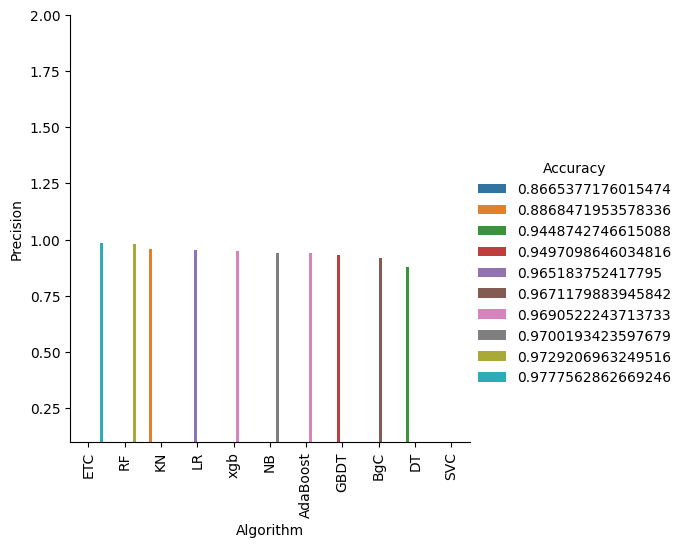

In [131]:
sns.catplot(x = 'Algorithm', y='Precision', 
               hue = 'Accuracy',data=performance_df, kind='bar',height=5)
plt.ylim(0.1,2.0)
plt.xticks(rotation='vertical')
plt.show()

In [132]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [133]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [134]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [135]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [136]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
1,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
2,KN,0.886847,0.956522,0.886847,0.956522,0.886847,0.956522,0.886847,0.956522
3,LR,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357
4,xgb,0.969052,0.949153,0.969052,0.949153,0.969052,0.949153,0.969052,0.949153
5,NB,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
6,AdaBoost,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667,0.969052,0.941667
7,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
8,BgC,0.967118,0.919355,0.967118,0.919355,0.967118,0.919355,0.967118,0.919355
9,DT,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505,0.944874,0.878505


In [137]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [138]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [139]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9709864603481625
Precision 1.0


In [140]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [143]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [144]:
print(y_pred)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

[0 0 0 ... 0 0 0]
Accuracy 0.9796905222437138
Precision 0.9465648854961832


# **Insights:**

> **Data Distribution:**
> There's an imbalance in the dataset, with more non-spam ('ham') messages compared to spam messages.

> **Feature Engineering:**
> The code extracts and examines various features like message length (characters, words, sentences) to potentially differentiate between spam and non-spam.

> **Text Processing:**
> The code preprocesses the text data, converting it into a format suitable for machine learning models by removing stopwords, punctuation, and stemming the words.

> **Model Performance:**
> Several classifiers are tested and evaluated based on accuracy and precision scores. It appears that ensemble methods are also explored to potentially improve the classification performance.

# **Models Used:**
> 
> # **Naive Bayes Classifiers:**
> 
> **Gaussian Naive Bayes:** It assumes that features follow a Gaussian distribution.

> **Multinomial Naive Bayes:** Specifically used for features with discrete counts (like word counts for text classification).

> **Bernoulli Naive Bayes:** Assumes that features are binary-valued (e.g., presence or absence of words).

> # **Ensemble Methods:**
> 
> **Stacking Classifier:** Combines multiple classification models via a meta-classifier, attempting to boost overall performance.

> **Voting Classifier:** Uses multiple base estimators and combines their predictions by majority voting or averaging.

> # **Other Classifiers:**
> 
> **Support Vector Machine (SVM):** Uses a kernel function to separate data into different classes.

> **Decision Tree Classifier:** Builds a tree-like structure to make decisions based on features.

> **Random Forest Classifier:** Utilizes an ensemble of decision trees to improve accuracy.

> **Gradient Boosting Classifier:** Builds multiple trees to correct errors in previous models.

> **XGBoost Classifier:** An advanced implementation of gradient boosting.